In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

## Trump data

In [3]:
# Using twitterscrape: 'twitterscraper from:RealDonaldTrump --output=trump.json'
# old_trump = pd.read_json('data/old-trump.json')
# print(old_trump.shape)
# print(old_trump.columns)

In [4]:
# Using twint: twint -u realDonaldTrump -o trump.json --json
trump = pd.read_json('data/trump.json', lines=True)
print(trump.shape)
print(trump.columns)

(40301, 31)
Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date'],
      dtype='object')


## Bolsonaro data 

In [5]:
# Source: 'twint -u jairbolsonaro -o bolsonaro.json --json'
bolsonaro = pd.read_json('data/bolsonaro.json', lines=True)
print(bolsonaro.shape)
print(bolsonaro.columns)

(6516, 31)
Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date'],
      dtype='object')


## Modi data

In [6]:
# Source: 'twint -u narendramodi -o modi.json --json'
modi = pd.read_json('data/modi.json', lines=True)
print(modi.shape)
print(modi.columns)

(13040, 31)
Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date'],
      dtype='object')


## Functions

In [7]:
data_sources = [trump, bolsonaro, modi]

In [8]:
#Make text for twitter lowercase to search for matching expressions

for sources in data_sources:
    sources['text_lower'] = sources.tweet.str.lower()

#### Count all fake news expressions, plot results

In [13]:
def fake_news_mentions(data, match = []):
    
    columns = []
    count_values = []
        
    #find patterns
    for i in match:
        data[i] = data['text_lower'].str.contains(i)
        
        columns.append(i)
        count_values.append(data[i].value_counts())

    # Convert True/False values to 0/1
    data[match] = data[match].astype('int32')
        
    # Create column with total fake_news
    data['fake_news_mention'] = data[match].sum(axis=1)
    print('Total fake_news labels: {}'.format(data.fake_news_mention.sum()))
    
    # Media mentions in Trumps tweets
    print('Media mentions: {}'.format(len(data[data['text_lower'].str.contains('media')])))


#### Aggregate tweets by day, vis & summary

In [17]:

def aggregate_tweets_day(data, title_vis):
    
    d = {'created_at':'tweets_per_day'}
    new_df = data.groupby(data.created_at.dt.date).\
    agg({'created_at':'count', 'fake_news_mention':'sum'}).rename(columns=d)
    
    fake_news = new_df[new_df['fake_news_mention'] > 0]
    fake_news.plot(style='o', alpha = 0.5)
    res = fake_news.index.to_series().diff()
    
    plt.title(title_vis)

    print('- First fake_news tweet: {}'.format(fake_news.index.min()))
    print('- Last tweet: {}'.format(fake_news.index.max()))
    
    print('- Average frequency: {} days'.format(res.mean()))
    
    

## Trump

In [18]:
trump_expressions = ['fake news', 'false news', 'fake media', 'falsenews', 'fakemedia', 'enemy of the people']
fake_news_mentions(trump, trump_expressions)

Total fake_news labels: 592
Media mentions: 1007


- First fake_news tweet: 2016-11-16
- Last tweet: 2019-11-11
- Average frequency: 2 days 21:01:25.488126 days


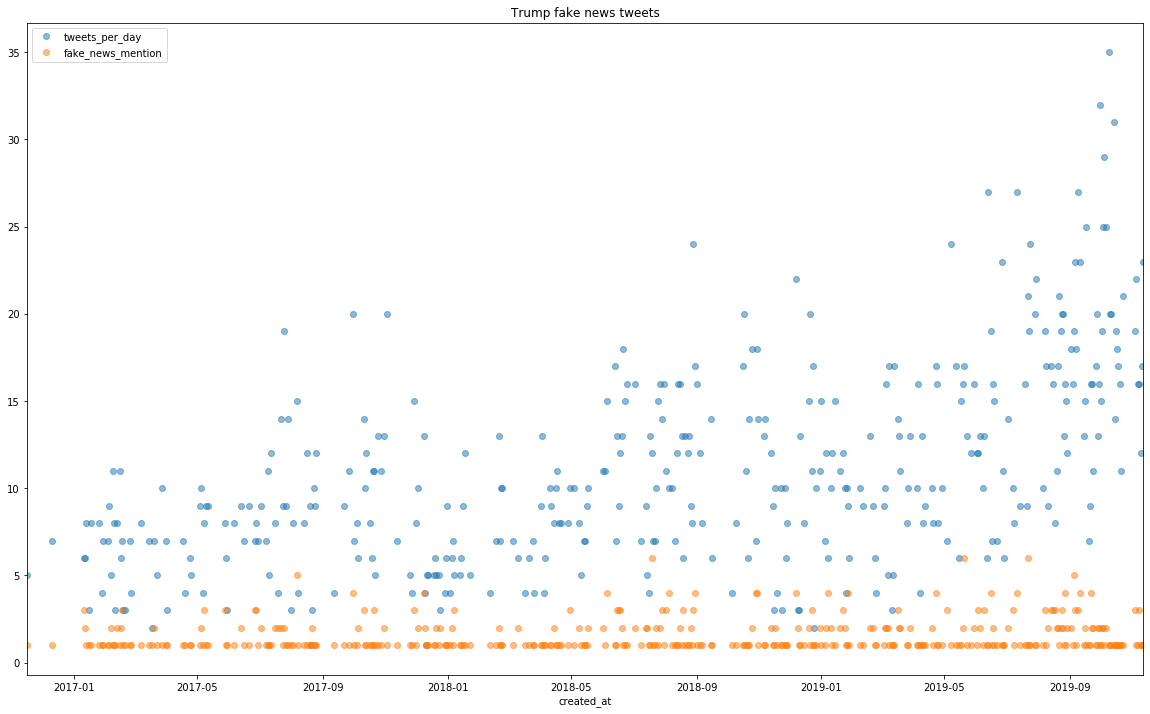

In [19]:
aggregate_tweets_day(trump, "Trump fake news tweets")

## Bolsonaro

In [20]:
fake_news_mentions(bolsonaro, trump_expressions)

Total fake_news labels: 32
Media mentions: 26


- First fake_news tweet: 2017-04-07
- Last tweet: 2019-10-23
- Average frequency: 34 days 09:46:40 days


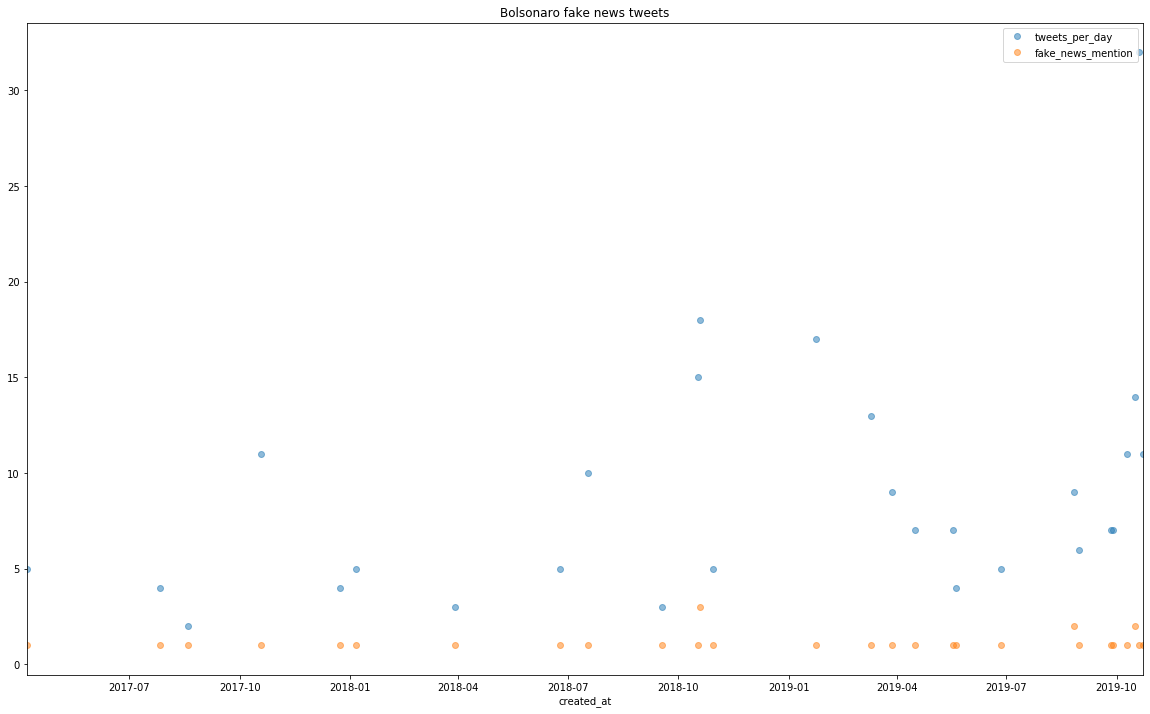

In [21]:
aggregate_tweets_day(bolsonaro, "Bolsonaro fake news tweets")

## Modi

In [22]:
fake_news_mentions(modi, trump_expressions)

Total fake_news labels: 3
Media mentions: 60


- First fake_news tweet: 2019-03-17
- Last tweet: 2019-03-21
- Average frequency: 2 days 00:00:00 days


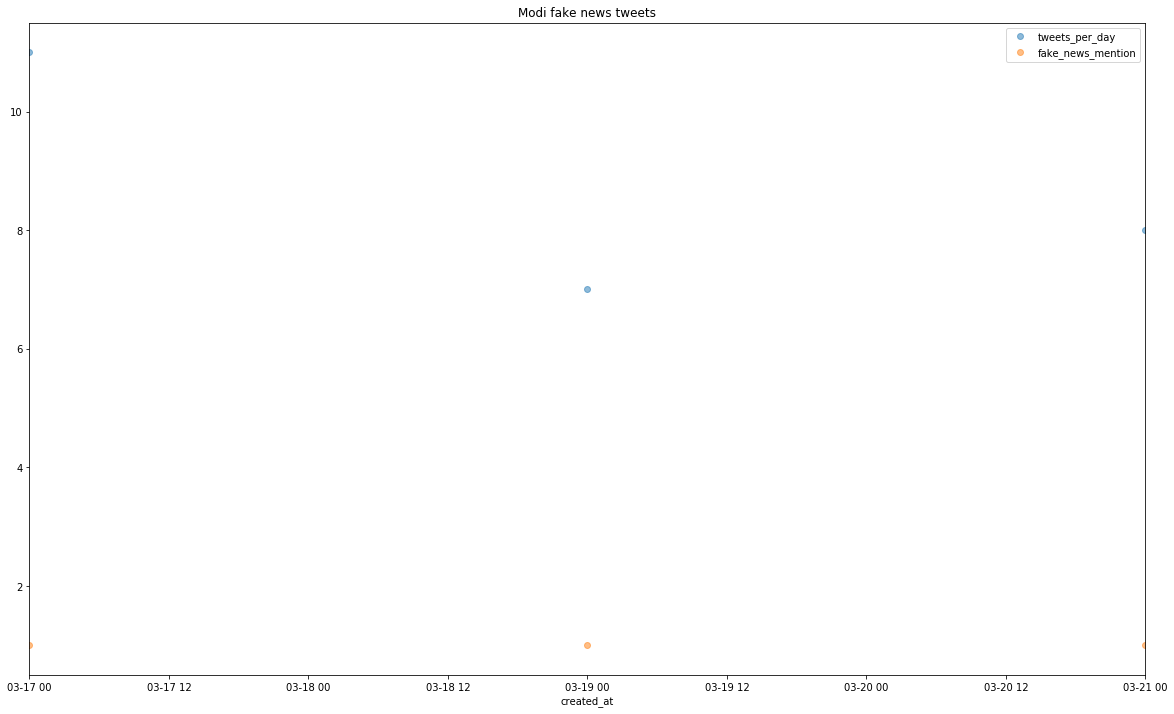

In [23]:
aggregate_tweets_day(modi, "Modi fake news tweets")